In [96]:
%run "..\..\Startup_py3.py"
sys.path.append(r"..\..\..\..\Documents")

import ImageAnalysis3 as ia
%matplotlib notebook

from ImageAnalysis3 import *
print(os.getpid())

import h5py
from ImageAnalysis3.classes import _allowed_kwds
import ast

19172


In [97]:
# Required plotting setting
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
plt.rc('font', serif='Arial')
from matplotlib.ticker import FormatStrFormatter

from ImageAnalysis3.figure_tools import _single_col_width, _font_size, _ticklabel_size,_ticklabel_width

In [3]:
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import FormatStrFormatter


In [63]:
postanalysis_folder = r'\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis'
print(postanalysis_folder)
dark_mode = True
if dark_mode:
    figure_folder = os.path.join(postanalysis_folder, 'Figures_0903_dark')
    plt.style.use('dark_background')
else:
    figure_folder = os.path.join(postanalysis_folder, 'Figures_0817')
print(figure_folder)

heatmap_figure_folder = os.path.join(figure_folder, 'Heatmaps')

if not os.path.exists(heatmap_figure_folder):
    print(f"Create: {heatmap_figure_folder}")
    os.makedirs(heatmap_figure_folder)
else:
    print(f"Use: {heatmap_figure_folder}")

\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis
\\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\Figures_0903_dark
Create: \\10.245.74.158\Chromatin_NAS_8\Analyzed_data\MouseBrain_PostAnalysis\Figures_0903_dark\Heatmaps


## load codebook

In [64]:
import pandas as pd
codebook = pd.read_csv(r'\\10.245.74.158\Chromatin_NAS_8\Exported_data\20220713-Export\merged_codebook.csv')

from ImageAnalysis3.structure_tools import distance
chr_2_indices, chr_2_orders = distance.Generate_PlotOrder(codebook, codebook, sort_by_region=False)

In [65]:
ensemble_pc1_filename = os.path.join(postanalysis_folder, 'ensemble_pc1.npy')

ensemble_normed_PC1 = np.load(ensemble_pc1_filename)
print(ensemble_normed_PC1.shape)

# define AB
ensemble_AB_dict = {}
AB_th = -0.5
ensemble_AB_dict['A'] = np.where(ensemble_normed_PC1 > AB_th)[0]
ensemble_AB_dict['B'] = np.where(ensemble_normed_PC1 <= AB_th)[0]

# by chr
ensemble_chr_2_AB = {}
for _chr in chr_2_indices:
    _chr_AB = {
        'A':np.array([list(chr_2_indices[_chr]).index(_ind) 
                      for _ind in np.intersect1d(chr_2_indices[_chr], ensemble_AB_dict['A'])], dtype=np.int32),
        'B':np.array([list(chr_2_indices[_chr]).index(_ind) 
                      for _ind in np.intersect1d(chr_2_indices[_chr], ensemble_AB_dict['B'])], dtype=np.int32),
    }
    ensemble_chr_2_AB[_chr] = _chr_AB

(1981,)


In [66]:
# result
result_folder = r'\\crick\SSD_0\Shiwei\DNA_MERFISH_analysis\Figures\draft_v1\Fig2_AB_marker_genes_heatmapt\class\figures'
os.listdir(result_folder)

['class_marker_AB_ratio.csv',
 'class_marker_AB_ratio_norm.csv',
 'class_marker_AB_ratio_norm_downregulated(grouped).png',
 'class_marker_AB_ratio_norm_downregulated(separated).png',
 'class_marker_AB_ratio_norm_upregulated(grouped).png',
 'class_marker_AB_ratio_norm_upregulated(separated).png',
 'Fig_class_marker_AB_ratio_norm.ipynb']

In [98]:
# result
result_folder = r'\\crick\SSD_0\Shiwei\DNA_MERFISH_analysis\Figures\draft_v1\Fig2_AB_marker_genes_heatmapt\class\figures'

groupby_savename = 'class'
norm_compiled_df_savename = os.path.join(result_folder,f'{groupby_savename}_marker_AB_ratio_norm.csv')

norm_compiled_df = pd.read_csv(norm_compiled_df_savename, index_col=0)
norm_compiled_df

,Gluta,GABA,Astro,Oligo,Micro,Endo,Marker_gene,Marker_group,Expression_change
loci_name,,,,,,,,,
chr1_133751779_133759866,1.000000,0.866963,0.921177,0.992174,0.897683,0.838041,Atp2b4,Gluta,upregulated
chr2_73741710_73759607,1.000000,0.923398,1.050175,0.946637,0.814647,0.865682,Chn1,Gluta,upregulated
chr2_120642920_120660445,1.000000,0.923965,0.993160,1.034202,0.986508,0.976183,Lrrc57,Gluta,upregulated
chr3_88476488_88486772,1.000000,0.902010,0.933029,0.930434,0.972249,0.820115,Sema4a,Gluta,upregulated
chr3_118450473_118462875,1.000000,1.019927,0.776180,0.921977,0.976511,0.834032,Gm26871,Gluta,upregulated
...,...,...,...,...,...,...,...,...,...
chr13_18750773_18759986,0.677504,0.756069,0.757338,0.806389,1.001856,1.000000,Vps41,Endo,downregulated
chr13_103749074_103760001,0.895680,0.892959,1.028608,1.032087,0.976046,1.000000,Srek1,Endo,downregulated
chr16_31248910_31259937,1.106936,1.013161,1.121175,1.043451,1.172842,1.000000,Acap2,Endo,downregulated


<IPython.core.display.Javascript object>


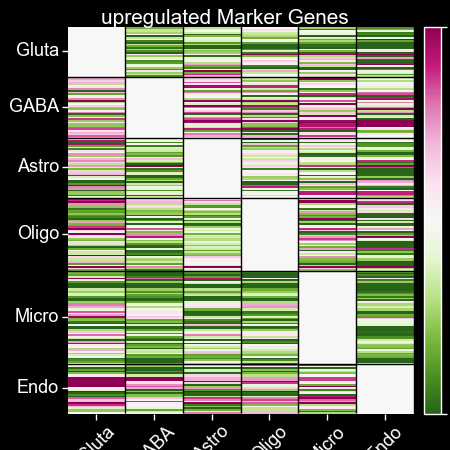

<IPython.core.display.Javascript object>


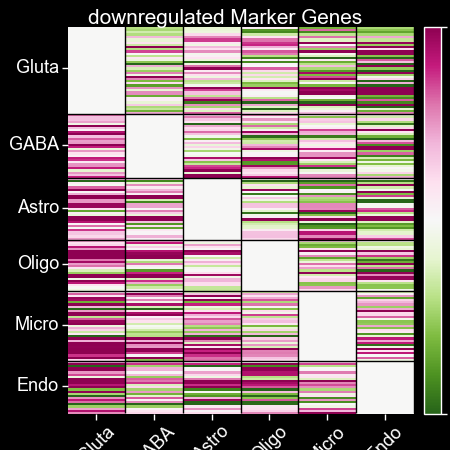

In [99]:
last_col = norm_compiled_df.columns.tolist().index('Marker_gene')
sorted_group_order = norm_compiled_df.columns[:last_col]
sorted_group_order

for _dir in ['upregulated','downregulated']:

    fig, ax = plt.subplots(figsize=(_single_col_width, _single_col_width), dpi=200)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    
    sub_compiled_df = norm_compiled_df[norm_compiled_df['Expression_change']==_dir]
    
    mat_df = sub_compiled_df[sorted_group_order]
    mat_plot = mat_df.to_numpy()
    
    #vmin, vmax = 2/3, 3/2
    vmin, vmax = 0.8, 1.25
    _pf = sns.heatmap(mat_plot, ax=ax, cbar_ax=cax, cmap='PiYG_r', 
                      norm=LogNorm(vmin=vmin, vmax=vmax),
                      cbar_kws={'ticks':np.round([vmin, vmax],2)}
                     )
    

    # xticks
    ax.set_xticks(ticks = np.arange(len(mat_df.columns))+0.5 )
    ax.set_xticklabels(labels = mat_df.columns, rotation=45,)

    # y ticks
    group_plot = sub_compiled_df.groupby(['Marker_group'],sort=False).size().index
    group_nums = np.array(sub_compiled_df.groupby(['Marker_group'],sort=False).size().tolist())
    group_edges = np.cumsum(group_nums)
    yticks = (group_edges[1:] + group_edges[:-1])/2
    yticks = np.insert(yticks,0, int(group_nums[0]/2))
    yticks=[(_t-0.5) for _t in yticks]
    ax.set_yticks(ticks = yticks)
    ytick_labels  = [f'{_l}' for _l in group_plot]
    ax.set_yticklabels(labels = ytick_labels,
               rotation=0)
    ax.tick_params('both', labelsize=_font_size-1, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    labelleft=True,
                    pad=1, ) # remove bottom ticklabels for ax1
    [i[1].set_linewidth(_ticklabel_width) for i in ax.spines.items()]
    # label
    ax.set_ylabel("Marker gene host cell type", fontsize=_font_size)
    # lines for separating
    ax.hlines(group_edges[:-1], -0.5, len(mat_df.columns), color='black', linewidth=0.5)
    ax.vlines(np.arange(len(mat_df.columns))+1, -0.5, len(mat_df)-0.5, color='black', linewidth=0.5)
    
    # cax
    cax.minorticks_off()
    cax.tick_params(labelsize=_font_size, width=_ticklabel_width, length=_ticklabel_size,)
    cax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    [i[1].set_linewidth(_ticklabel_width) for i in cax.spines.items()]

    fig.suptitle(f'{_dir} Marker Genes', fontsize=_font_size, )
    fig.subplots_adjust(wspace=0.1, hspace=0., left=0.15, right=0.98, top=0.94, bottom=0.08)

    fig.savefig(os.path.join(heatmap_figure_folder, f"Heatmap_{_dir}_{groupby_savename}.pdf"),
                transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
    fig.savefig(os.path.join(heatmap_figure_folder, f"Heatmap_{_dir}_{groupby_savename}.png"),
                transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
    plt.show()

In [114]:
norm_compiled_df

,Gluta,GABA,Astro,Oligo,Micro,Endo,Marker_gene,Marker_group,Expression_change
loci_name,,,,,,,,,
chr1_133751779_133759866,1.000000,0.866963,0.921177,0.992174,0.897683,0.838041,Atp2b4,Gluta,upregulated
chr2_73741710_73759607,1.000000,0.923398,1.050175,0.946637,0.814647,0.865682,Chn1,Gluta,upregulated
chr2_120642920_120660445,1.000000,0.923965,0.993160,1.034202,0.986508,0.976183,Lrrc57,Gluta,upregulated
chr3_88476488_88486772,1.000000,0.902010,0.933029,0.930434,0.972249,0.820115,Sema4a,Gluta,upregulated
chr3_118450473_118462875,1.000000,1.019927,0.776180,0.921977,0.976511,0.834032,Gm26871,Gluta,upregulated
...,...,...,...,...,...,...,...,...,...
chr13_18750773_18759986,0.677504,0.756069,0.757338,0.806389,1.001856,1.000000,Vps41,Endo,downregulated
chr13_103749074_103760001,0.895680,0.892959,1.028608,1.032087,0.976046,1.000000,Srek1,Endo,downregulated
chr16_31248910_31259937,1.106936,1.013161,1.121175,1.043451,1.172842,1.000000,Acap2,Endo,downregulated


In [124]:
sub_compiled_df = norm_compiled_df[norm_compiled_df['Expression_change']=='upregulated']
up_vals = sub_compiled_df[sub_compiled_df['Marker_group'] == 'Gluta'].values[:,1:-3].astype(np.float32)

In [125]:
sub_compiled_df = norm_compiled_df[norm_compiled_df['Expression_change']=='downregulated']
down_vals = sub_compiled_df[sub_compiled_df['Marker_group'] == 'Gluta'].values[:,1:-3].astype(np.float32)

In [131]:
np.mean(up_vals < 1)

0.7733333333333333

<IPython.core.display.Javascript object>


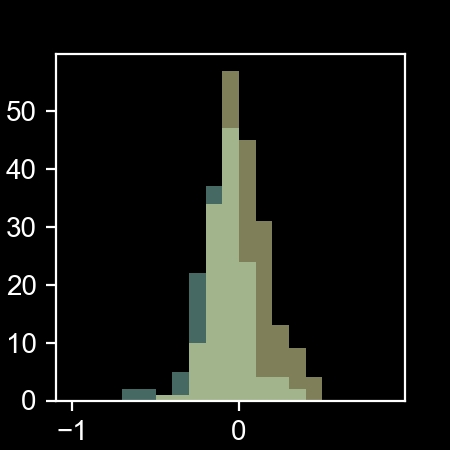

(array([ 0.,  0.,  0.,  0.,  0.,  1.,  1., 10., 34., 57., 45., 31., 13.,
         9.,  4.,  0.,  0.,  0.,  0.]),
 array([-1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
        -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
        -2.00000000e-01, -1.00000000e-01, -2.22044605e-16,  1.00000000e-01,
         2.00000000e-01,  3.00000000e-01,  4.00000000e-01,  5.00000000e-01,
         6.00000000e-01,  7.00000000e-01,  8.00000000e-01,  9.00000000e-01]),
 <BarContainer object of 19 artists>)

In [128]:

fig, ax = plt.subplots(figsize=(_single_col_width, _single_col_width), dpi=200)
ax.hist(np.ravel(np.log(up_vals)), bins=np.arange(-1,1,0.1),alpha=0.5)
ax.hist(np.ravel(np.log(down_vals)), bins=np.arange(-1,1,0.1),alpha=0.5)

<IPython.core.display.Javascript object>


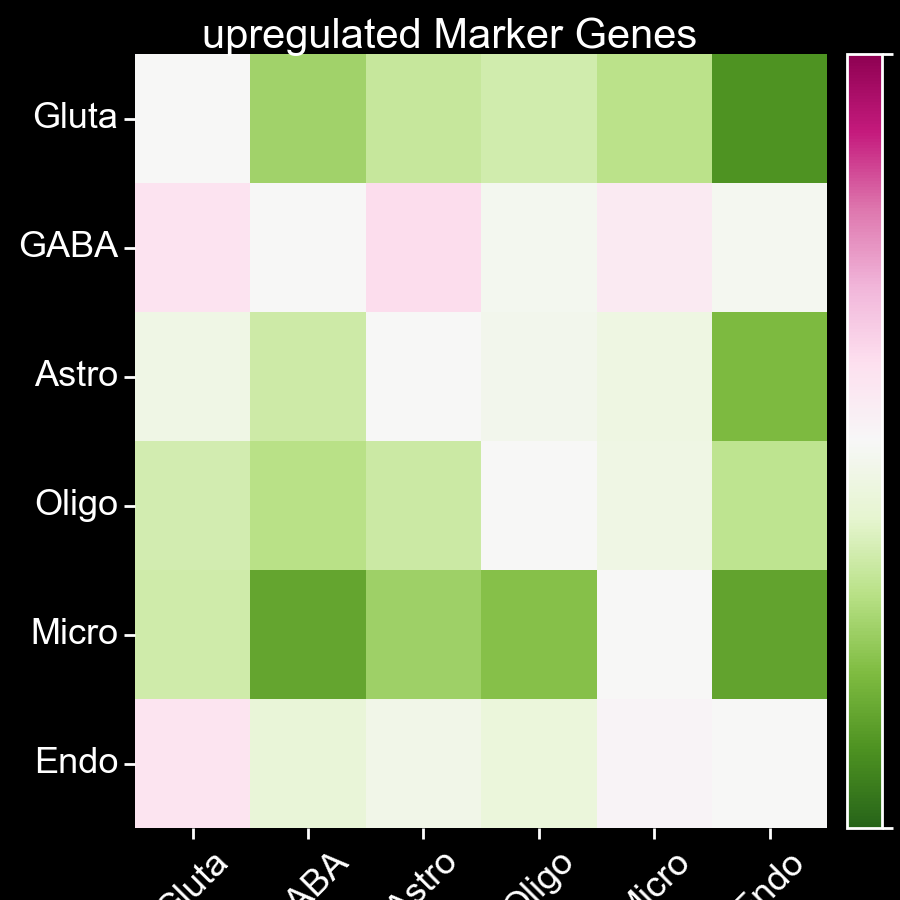

<IPython.core.display.Javascript object>


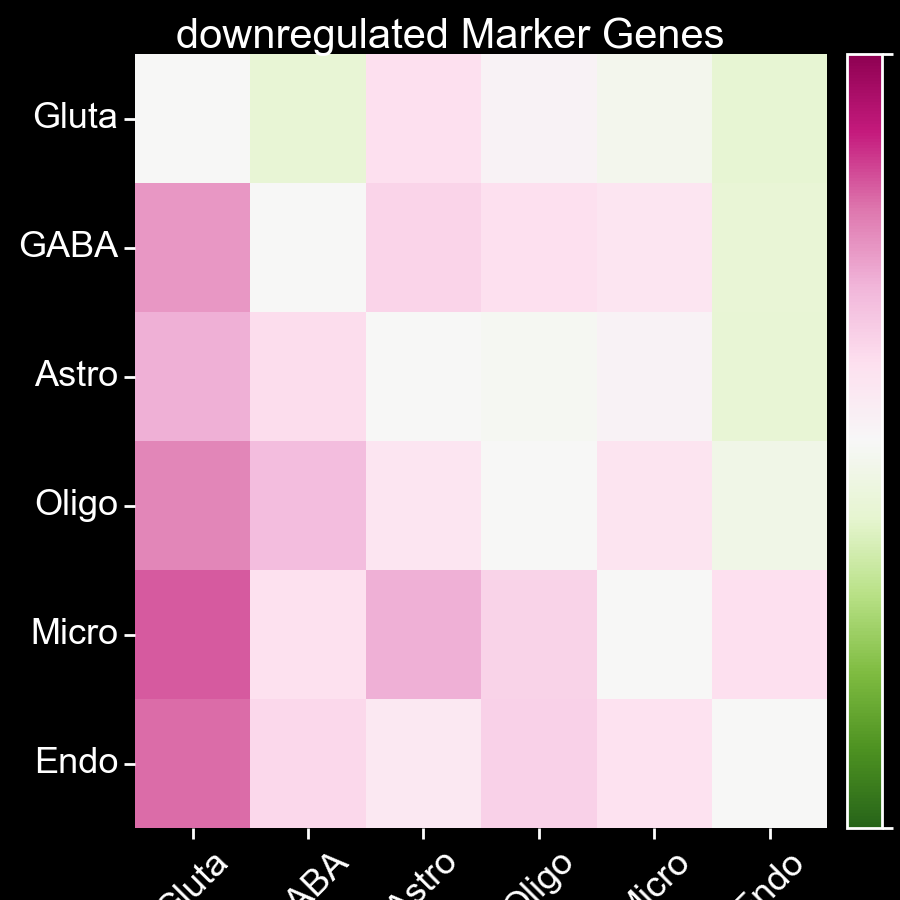

In [71]:
for _dir in ['upregulated','downregulated']:

    fig, ax = plt.subplots(figsize=(_single_col_width, _single_col_width), dpi=200)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    
    sub_compiled_df = norm_compiled_df[norm_compiled_df['Expression_change']==_dir]
    
    mat_df = sub_compiled_df.groupby(['Marker_group'],sort=False).median()
    #mat_df = sub_compiled_df[sorted_group_order]
    #mat_plot = mat_df.to_numpy()
    
    vmin, vmax = 0.8,1.25
    _pf = sns.heatmap(mat_df, ax=ax, cbar_ax=cax, cmap='PiYG_r', 
                      norm=LogNorm(vmin=vmin, vmax=vmax),
                      cbar_kws={'ticks':np.round([vmin, vmax],2)}
                     )
    

    # xticks
    #ax.set_xticks(ticks = np.arange(len(mat_df.columns))+0.5 )
    ax.set_xticklabels(labels = mat_df.columns, rotation=45,)

    # y ticks
    group_plot = sub_compiled_df.groupby(['Marker_group'],sort=False).size().index
    group_nums = np.array(sub_compiled_df.groupby(['Marker_group'],sort=False).size().tolist())
    group_edges = np.cumsum(group_nums)
    yticks = (group_edges[1:] + group_edges[:-1])/2
    yticks = np.insert(yticks,0, int(group_nums[0]/2))
    yticks=[(_t-0.5) for _t in yticks]
    #ax.set_yticks(ticks = yticks)
    ytick_labels  = [f'{_l}' for _l in group_plot]
    ax.set_yticklabels(labels = ytick_labels,
               rotation=0)
    ax.tick_params('both', labelsize=_font_size-1, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    labelleft=True,
                    pad=1, ) # remove bottom ticklabels for ax1
    [i[1].set_linewidth(_ticklabel_width) for i in ax.spines.items()]
    # label
    ax.set_ylabel("Marker gene host cell type", fontsize=_font_size)
    # lines for separating
    #ax.hlines(group_edges[:-1], -0.5, len(mat_df.columns), color='black', linewidth=0.5)
    #ax.vlines(np.arange(len(mat_df.columns))+1, -0.5, len(mat_df)-0.5, color='black', linewidth=0.5)
    
    # cax
    cax.minorticks_off()
    cax.tick_params(labelsize=_font_size, width=_ticklabel_width, length=_ticklabel_size,)
    cax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    [i[1].set_linewidth(_ticklabel_width) for i in cax.spines.items()]

    fig.suptitle(f'{_dir} Marker Genes', fontsize=_font_size, )
    fig.subplots_adjust(wspace=0.1, hspace=0., left=0.15, right=0.98, top=0.94, bottom=0.08)

    fig.savefig(os.path.join(heatmap_figure_folder, f"Heatmap_grouped_{_dir}_{groupby_savename}.pdf"),
                transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
    fig.savefig(os.path.join(heatmap_figure_folder, f"Heatmap_grouped_{_dir}_{groupby_savename}.png"),
                transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
    plt.show()

# Neurons

In [72]:
# result
result_folder = r'\\crick\SSD_0\Shiwei\DNA_MERFISH_analysis\Figures\draft_v1\Fig2_AB_marker_genes_heatmapt\neuron\figures'

groupby_savename = 'neurons'
norm_compiled_df_savename = os.path.join(result_folder,f'{groupby_savename}_marker_AB_ratio_norm.csv')

norm_compiled_df = pd.read_csv(norm_compiled_df_savename, index_col=0)
norm_compiled_df

,L2/3 IT,L4/5 IT,L5 IT,L5 ET,L5/6 NP,L6 CT,L6 IT,L6b,Pvalb,Sst,Vip,Lamp5,Marker_gene,Marker_group,Expression_change
loci_name,,,,,,,,,,,,,,,
chr1_57812315_57822455,1.000000,0.969735,0.999351,0.985829,0.647566,0.698115,1.042610,0.811971,0.827888,0.834199,0.740489,0.889919,Spats2l,L2/3 IT,upregulated
chr2_136042239_136062239,1.000000,1.017091,0.881102,0.837100,0.839638,0.905236,0.878998,0.736198,0.884135,1.019224,0.966784,0.976674,Lamp5,L2/3 IT,upregulated
chr3_118450473_118462875,1.000000,0.972542,1.038194,1.139019,0.929318,0.984434,1.022480,0.876448,1.037552,1.129578,0.943785,0.860589,Gm26871,L2/3 IT,upregulated
chr3_137616409_137640401,1.000000,0.982057,0.947773,0.838542,0.818288,0.920704,0.962683,0.800068,0.922178,0.919007,0.927080,0.895460,Ddit4l,L2/3 IT,upregulated
chr3_153748838_153759973,1.000000,1.023994,1.049358,1.036106,0.761722,0.995428,1.071282,0.895184,1.103098,1.024964,0.827649,0.903905,St6galnac3,L2/3 IT,upregulated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr17_26244544_26259946,1.339409,1.259199,1.159408,1.183262,1.143847,1.331016,1.234148,1.099214,1.048091,1.078051,1.106122,1.000000,Rgs11,Lamp5,downregulated
chr17_51773414_51783042,1.236066,1.109023,1.094635,1.010016,1.041106,1.129866,1.136768,0.978697,1.123089,1.165912,1.191299,1.000000,Satb1,Lamp5,downregulated
chr19_20537560_20551687,1.125857,1.009882,0.895677,1.173419,0.840998,1.067030,1.019210,1.029475,0.901070,0.905700,0.993806,1.000000,C730002L08Rik,Lamp5,downregulated


<IPython.core.display.Javascript object>


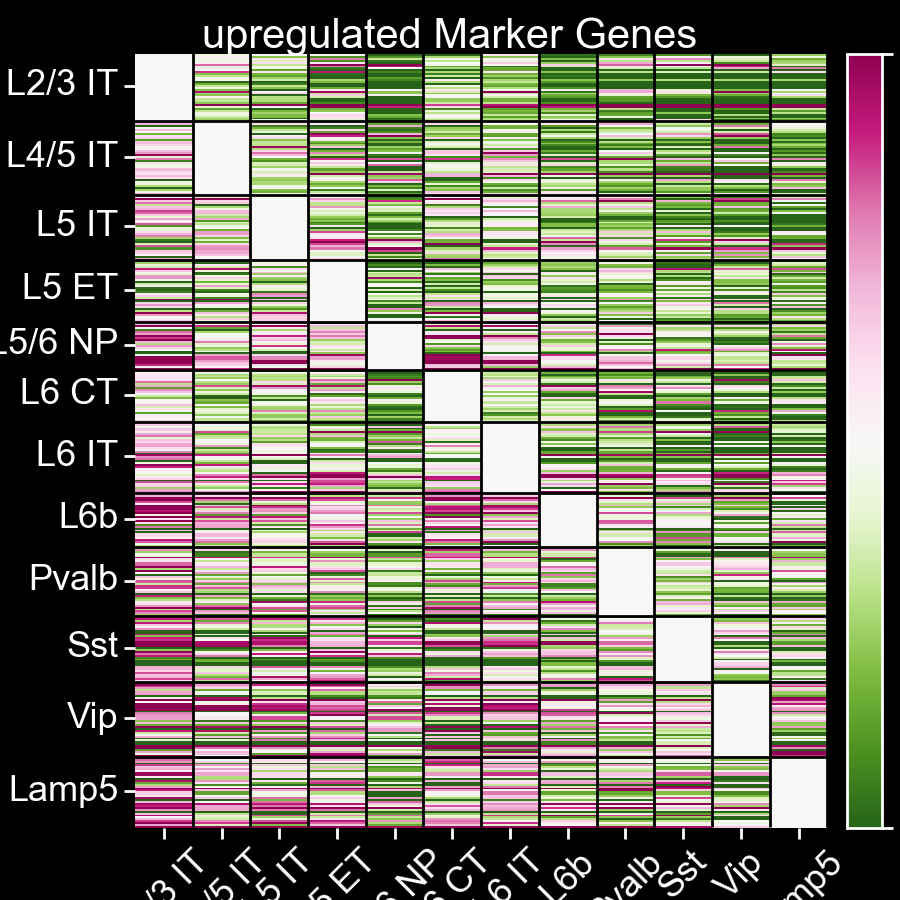

<IPython.core.display.Javascript object>


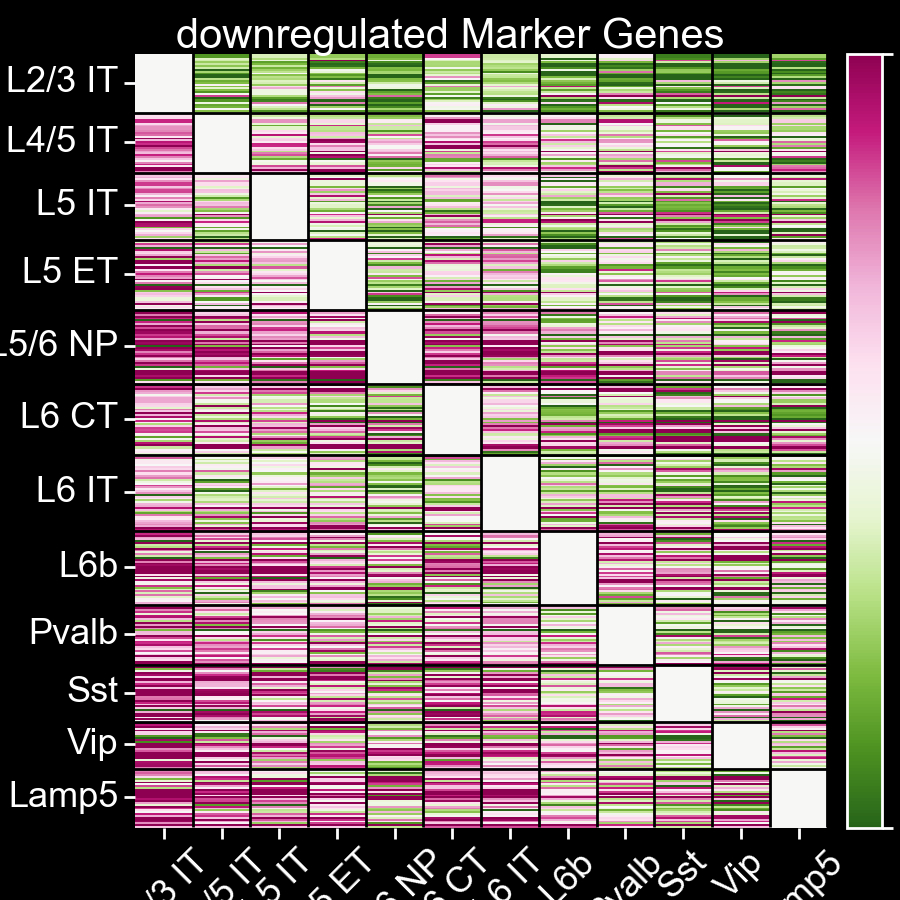

In [74]:
last_col = norm_compiled_df.columns.tolist().index('Marker_gene')
sorted_group_order = norm_compiled_df.columns[:last_col]
sorted_group_order

for _dir in ['upregulated','downregulated']:

    fig, ax = plt.subplots(figsize=(_single_col_width, _single_col_width), dpi=200)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    
    sub_compiled_df = norm_compiled_df[norm_compiled_df['Expression_change']==_dir]
    
    mat_df = sub_compiled_df[sorted_group_order]
    mat_plot = mat_df.to_numpy()
    
    vmin, vmax = 0.8, 1.25
    _pf = sns.heatmap(mat_plot, ax=ax, cbar_ax=cax, cmap='PiYG_r', 
                      norm=LogNorm(vmin=vmin, vmax=vmax),
                      cbar_kws={'ticks':np.round([vmin, vmax],2)}
                     )
    

    # xticks
    ax.set_xticks(ticks = np.arange(len(mat_df.columns))+0.5 )
    ax.set_xticklabels(labels = mat_df.columns, rotation=45,)

    # y ticks
    group_plot = sub_compiled_df.groupby(['Marker_group'],sort=False).size().index
    group_nums = np.array(sub_compiled_df.groupby(['Marker_group'],sort=False).size().tolist())
    group_edges = np.cumsum(group_nums)
    yticks = (group_edges[1:] + group_edges[:-1])/2
    yticks = np.insert(yticks,0, int(group_nums[0]/2))
    yticks=[(_t-0.5) for _t in yticks]
    ax.set_yticks(ticks = yticks)
    ytick_labels  = [f'{_l}' for _l in group_plot]
    ax.set_yticklabels(labels = ytick_labels,
               rotation=0)
    ax.tick_params('both', labelsize=_font_size-1, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    labelleft=True,
                    pad=1, ) # remove bottom ticklabels for ax1
    [i[1].set_linewidth(_ticklabel_width) for i in ax.spines.items()]
    # label
    ax.set_ylabel("Marker gene host cell type", fontsize=_font_size)
    # lines for separating
    ax.hlines(group_edges[:-1], -0.5, len(mat_df.columns), color='black', linewidth=0.5)
    ax.vlines(np.arange(len(mat_df.columns))+1, -0.5, len(mat_df)-0.5, color='black', linewidth=0.5)
    
    # cax
    cax.minorticks_off()
    cax.tick_params(labelsize=_font_size, width=_ticklabel_width, length=_ticklabel_size,)
    cax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    
    [i[1].set_linewidth(_ticklabel_width) for i in cax.spines.items()]

    fig.suptitle(f'{_dir} Marker Genes', fontsize=_font_size, )
    fig.subplots_adjust(wspace=0.1, hspace=0., left=0.15, right=0.98, top=0.94, bottom=0.08)

    fig.savefig(os.path.join(heatmap_figure_folder, f"Heatmap_{_dir}_{groupby_savename}.pdf"),
                transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
    fig.savefig(os.path.join(heatmap_figure_folder, f"Heatmap_{_dir}_{groupby_savename}.png"),
                transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
    plt.show()

# SE

In [82]:
result_folder = r'\\crick\SSD_0\Shiwei\DNA_MERFISH_analysis\Figures\draft_v1\Fig2_AB_super_enhancers_heatmapt\figures'

groupby_savename = 'SE'
norm_compiled_df_savename = os.path.join(result_folder,f'{groupby_savename}_marker_AB_ratio_norm.csv')

norm_compiled_df = pd.read_csv(norm_compiled_df_savename, index_col=0)
norm_compiled_df

,L2/3 IT,L4/5 IT,L5 IT,L5/6 NP,L6 CT,L6 IT,L6b,Pvalb,Sst,Vip,Lamp5,Astro,Oligo,Micro,Marker_group,Expression_change
loci_name,,,,,,,,,,,,,,,,
chr1_9799472_9811359,1.000000,1.060552,1.050139,1.070086,0.956470,0.881730,1.193394,1.023173,0.722187,0.884414,0.886008,1.031665,0.958072,1.122289,L2/3 IT,upregulated
chr1_21522568_21534512,1.000000,0.973439,0.865382,0.722477,0.647509,0.871696,0.644780,0.700260,0.561699,0.733786,1.056215,0.587486,0.538609,0.622116,L2/3 IT,upregulated
chr1_62926942_62936078,1.000000,0.923669,0.987279,1.010933,0.835695,0.970487,0.971800,0.918628,1.034021,0.754011,1.236236,1.024201,0.927838,0.867490,L2/3 IT,upregulated
chr2_135670388_135680581,1.000000,0.987517,0.890724,0.915768,0.922376,0.960919,0.696952,0.835445,0.811519,0.872883,0.856324,0.920035,0.818166,0.774113,L2/3 IT,upregulated
chr3_157181787_157191783,1.000000,1.021009,0.824937,0.923519,0.911841,0.946495,0.868306,0.835059,0.992604,0.915840,0.991021,0.818252,0.783007,0.753020,L2/3 IT,upregulated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr3_33382622_33393488,1.542988,1.416434,1.318610,1.285100,1.329703,1.209037,1.326396,1.271264,1.256071,1.232037,1.332645,1.071915,1.182762,1.000000,Micro,random_control
chr11_70588118_70599437,1.102579,1.037656,1.019489,1.001869,1.030348,1.035794,0.924806,0.917936,0.884936,0.767162,0.992473,0.952379,1.004517,1.000000,Micro,random_control
chr7_127672637_127683264,1.303456,1.089690,1.188822,0.968090,1.276462,1.208379,1.061453,1.049543,0.967895,0.940522,0.999677,0.984982,1.082972,1.000000,Micro,random_control


<IPython.core.display.Javascript object>


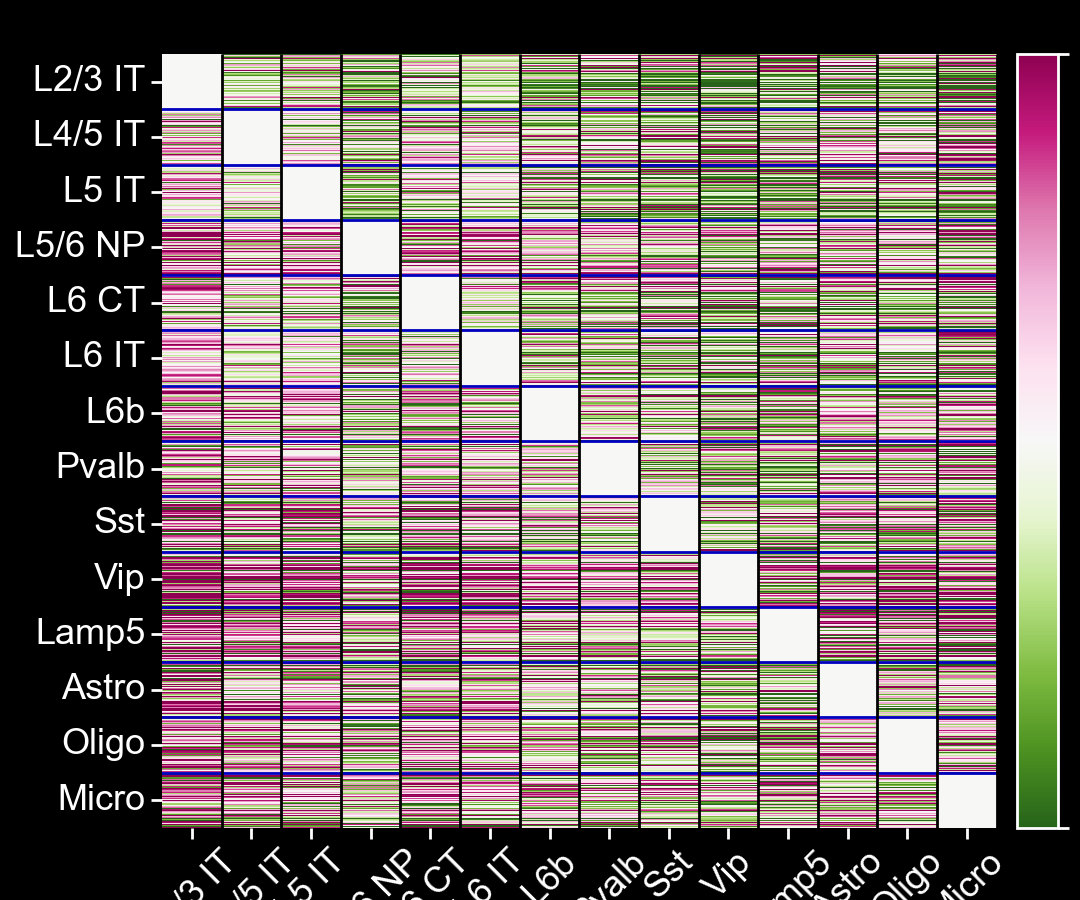

<IPython.core.display.Javascript object>


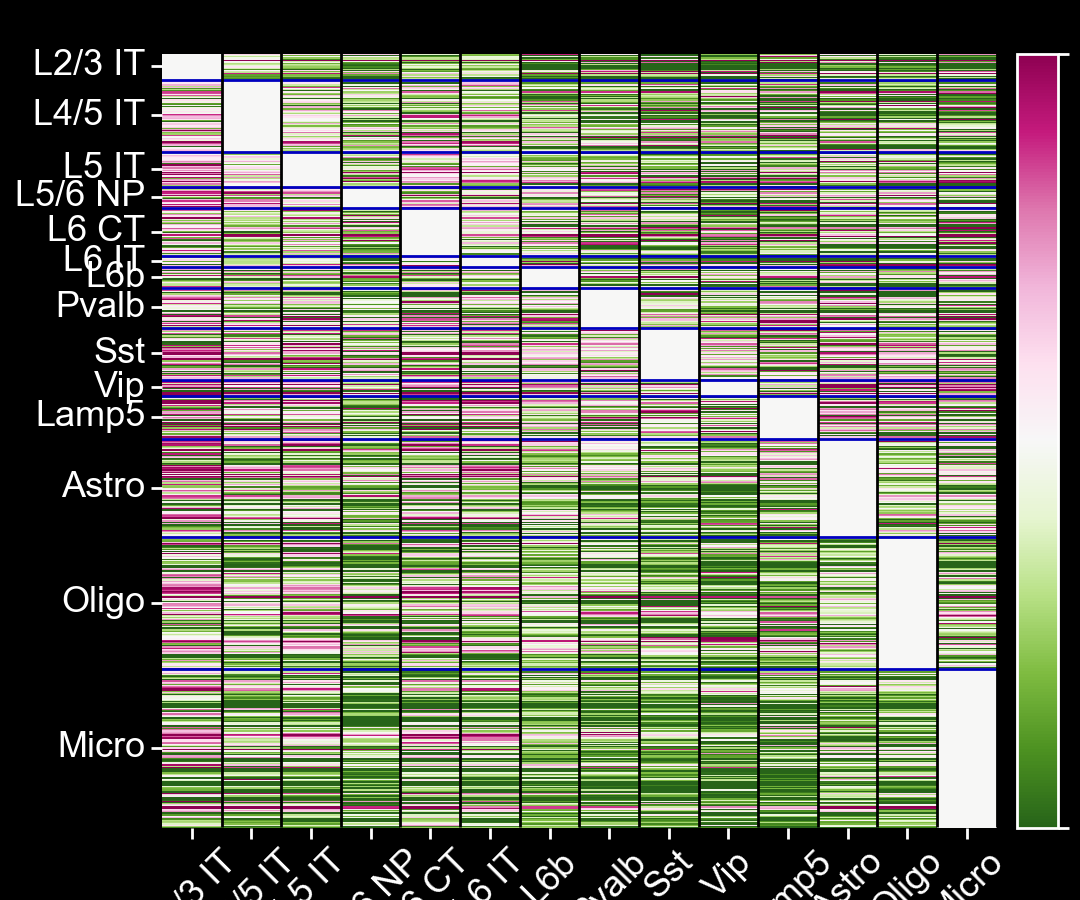

In [83]:
last_col = norm_compiled_df.columns.tolist().index('Marker_group')
sorted_group_order = norm_compiled_df.columns[:last_col]
sorted_group_order

for _dir in np.unique(norm_compiled_df['Expression_change'].tolist()):

    fig, ax = plt.subplots(figsize=(_single_col_width*1.2, _single_col_width), dpi=200)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    
    sub_compiled_df = norm_compiled_df[norm_compiled_df['Expression_change']==_dir]
    
    mat_df = sub_compiled_df[sorted_group_order]
    mat_plot = mat_df.to_numpy()
    
    vmin, vmax = 0.8, 1.25
    _pf = sns.heatmap(mat_plot, ax=ax, cbar_ax=cax, cmap='PiYG_r', #cmap='PRGn_r', 
                      norm=LogNorm(vmin=vmin, vmax=vmax),
                      cbar_kws={'ticks':np.round([vmin, vmax],2)}
                     )
    

    # xticks
    ax.set_xticks(ticks = np.arange(len(mat_df.columns))+0.5 )
    ax.set_xticklabels(labels = mat_df.columns, rotation=45,)

    # y ticks
    group_plot = sub_compiled_df.groupby(['Marker_group'],sort=False).size().index
    group_nums = np.array(sub_compiled_df.groupby(['Marker_group'],sort=False).size().tolist())
    group_edges = np.cumsum(group_nums)
    yticks = (group_edges[1:] + group_edges[:-1])/2
    yticks = np.insert(yticks,0, int(group_nums[0]/2))
    yticks=[(_t-0.5) for _t in yticks]
    ax.set_yticks(ticks = yticks)
    ytick_labels  = [f'{_l}' for _l in group_plot]
    ax.set_yticklabels(labels = ytick_labels,
               rotation=0)
    ax.tick_params('both', labelsize=_font_size-1, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    labelleft=True,
                    pad=1, ) # remove bottom ticklabels for ax1
    [i[1].set_linewidth(_ticklabel_width) for i in ax.spines.items()]
    # label
    ax.set_ylabel("Super-enhancer host cell type", fontsize=_font_size)
    # lines for separating
    ax.hlines(group_edges[:-1], -0.5, len(mat_df.columns), color=[0.,0.,0.75], linewidth=0.5)
    ax.vlines(np.arange(len(mat_df.columns))+1, -0.5, len(mat_df)-0.5, color='black', linewidth=0.5)
    
    # cax
    cax.minorticks_off()
    cax.tick_params(labelsize=_font_size, width=_ticklabel_width, length=_ticklabel_size,)
    cax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    [i[1].set_linewidth(_ticklabel_width) for i in cax.spines.items()]

    #fig.suptitle(f'{_dir} Super Enhancers', fontsize=_font_size, )
    fig.subplots_adjust(wspace=0.1, hspace=0., left=0.15, right=0.98, top=0.94, bottom=0.08)

    fig.savefig(os.path.join(heatmap_figure_folder, f"Heatmap_{_dir}_{groupby_savename}.pdf"),
                transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
    fig.savefig(os.path.join(heatmap_figure_folder, f"Heatmap_{_dir}_{groupby_savename}.png"),
                transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
    plt.show()
    
    

In [85]:
sub_compiled_df

,L2/3 IT,L4/5 IT,L5 IT,L5/6 NP,L6 CT,L6 IT,L6b,Pvalb,Sst,Vip,Lamp5,Astro,Oligo,Micro,Marker_group,Expression_change
loci_name,,,,,,,,,,,,,,,,
chr1_9799472_9811359,1.000000,1.060552,1.050139,1.070086,0.956470,0.881730,1.193394,1.023173,0.722187,0.884414,0.886008,1.031665,0.958072,1.122289,L2/3 IT,upregulated
chr1_21522568_21534512,1.000000,0.973439,0.865382,0.722477,0.647509,0.871696,0.644780,0.700260,0.561699,0.733786,1.056215,0.587486,0.538609,0.622116,L2/3 IT,upregulated
chr1_62926942_62936078,1.000000,0.923669,0.987279,1.010933,0.835695,0.970487,0.971800,0.918628,1.034021,0.754011,1.236236,1.024201,0.927838,0.867490,L2/3 IT,upregulated
chr2_135670388_135680581,1.000000,0.987517,0.890724,0.915768,0.922376,0.960919,0.696952,0.835445,0.811519,0.872883,0.856324,0.920035,0.818166,0.774113,L2/3 IT,upregulated
chr3_157181787_157191783,1.000000,1.021009,0.824937,0.923519,0.911841,0.946495,0.868306,0.835059,0.992604,0.915840,0.991021,0.818252,0.783007,0.753020,L2/3 IT,upregulated
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
chr19_37486319_37506465,0.909679,0.849514,0.881100,0.961185,0.959608,0.813820,0.884452,0.907028,0.899496,0.813020,0.912397,0.851862,0.875862,1.000000,Micro,upregulated
chr19_41318138_41327273,0.950911,0.880474,0.849256,0.919274,1.039362,0.970019,0.839670,0.898086,0.828338,0.804503,0.827436,0.869798,0.899319,1.000000,Micro,upregulated
chr19_42001331_42011008,1.039464,0.952639,0.948423,0.994570,1.113712,1.010493,0.940381,0.959975,0.875466,1.027640,0.841022,0.963904,0.970531,1.000000,Micro,upregulated


<IPython.core.display.Javascript object>


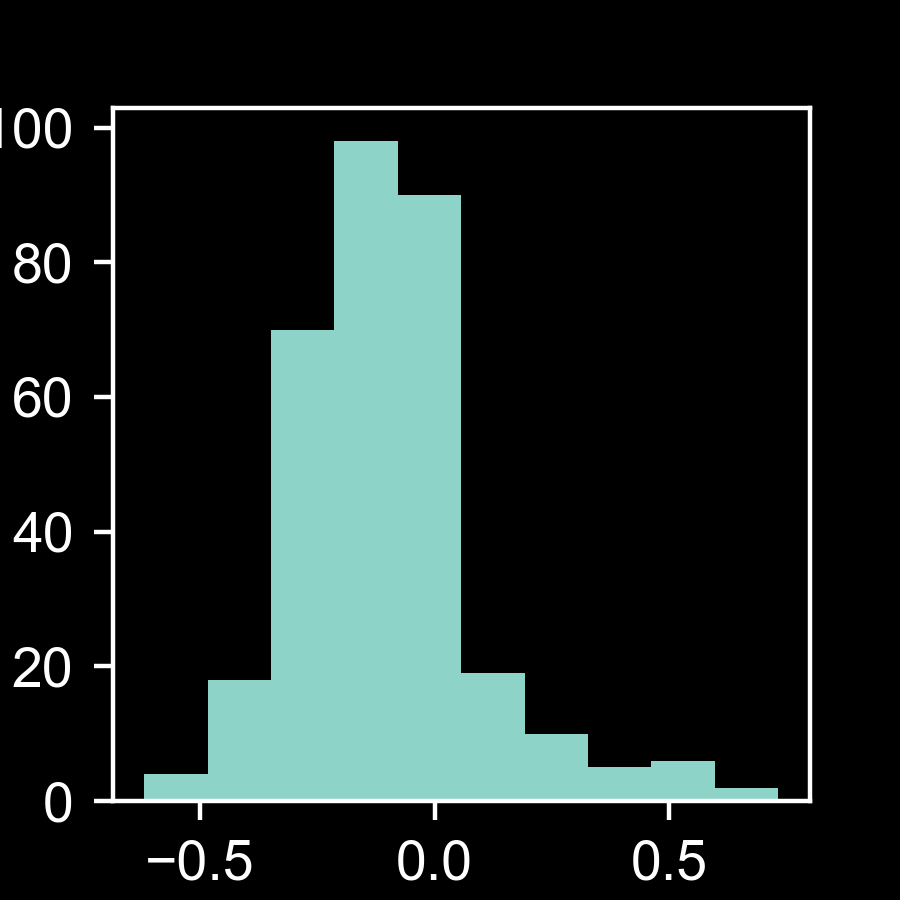

(array([ 4., 18., 70., 98., 90., 19., 10.,  5.,  6.,  2.]),
 array([-0.61876523, -0.4836973 , -0.34862936, -0.21356142, -0.07849348,
         0.05657446,  0.1916424 ,  0.32671034,  0.46177828,  0.5968462 ,
         0.73191416], dtype=float32),
 <BarContainer object of 10 artists>)

<IPython.core.display.Javascript object>


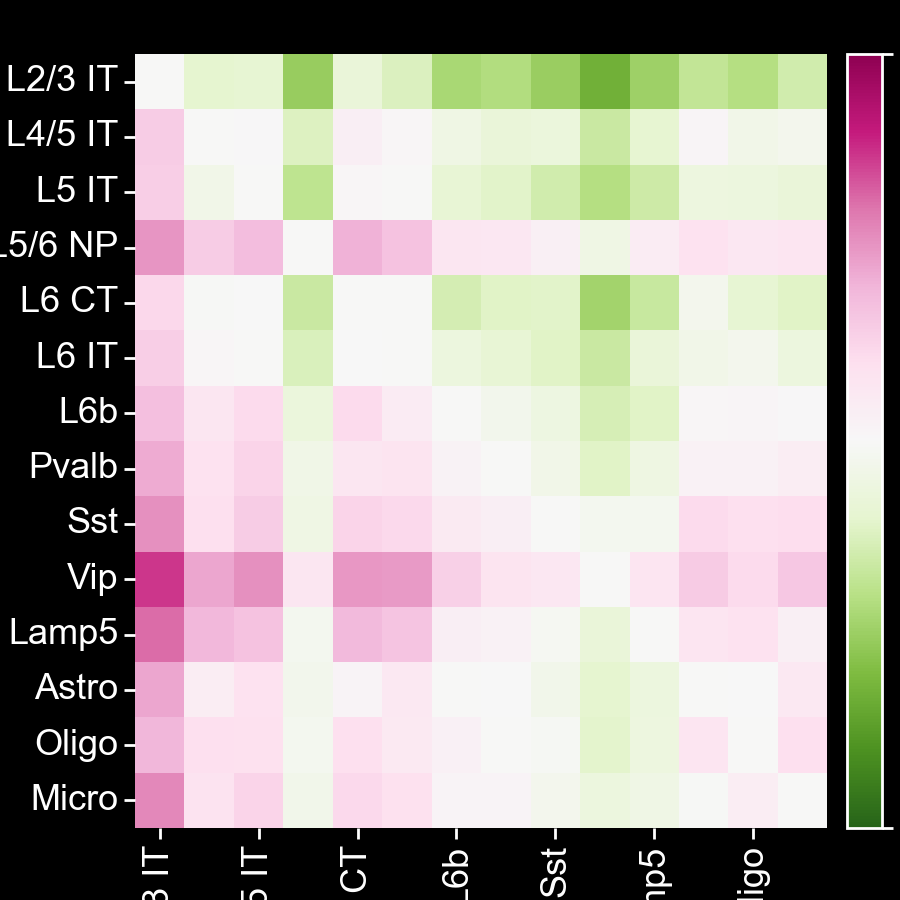

<IPython.core.display.Javascript object>


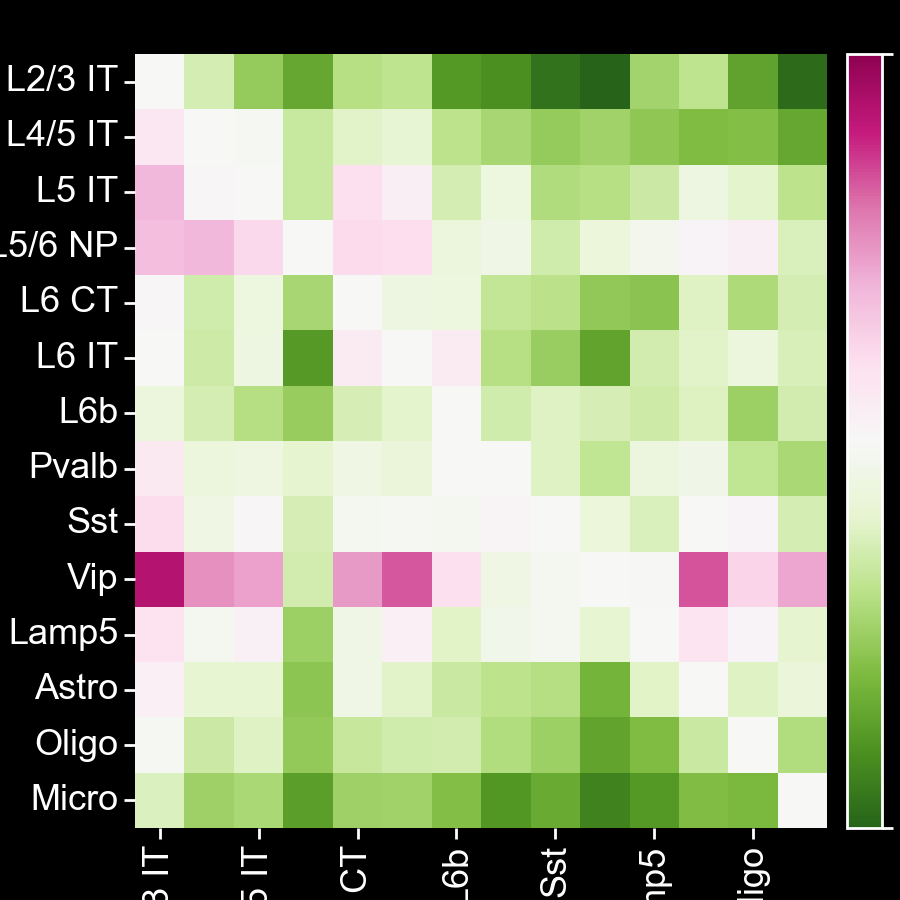

In [78]:
last_col = norm_compiled_df.columns.tolist().index('Marker_group')
sorted_group_order = norm_compiled_df.columns[:last_col]
sorted_group_order

for _dir in np.unique(norm_compiled_df['Expression_change'].tolist()):

    fig, ax = plt.subplots(figsize=(_single_col_width, _single_col_width), dpi=200)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    
    sub_compiled_df = norm_compiled_df[norm_compiled_df['Expression_change']==_dir]
    
    
    mat_df = sub_compiled_df.groupby(['Marker_group'],sort=False).median()
    #mat_df = sub_compiled_df[sorted_group_order]
    #mat_plot = mat_df.to_numpy()
    
    vmin, vmax = 0.8, 1.25
    _pf = sns.heatmap(mat_df, ax=ax, cbar_ax=cax, cmap='PiYG_r', #cmap='PRGn_r', 
                      norm=LogNorm(vmin=vmin, vmax=vmax),
                      cbar_kws={'ticks':np.round([vmin, vmax],2)}
                     )
    

    # xticks
    #ax.set_xticks(ticks = np.arange(len(mat_df.columns))+0.5 )
    #ax.set_xticklabels(labels = mat_df.columns, rotation=45,)

    # y ticks
    group_plot = sub_compiled_df.groupby(['Marker_group'],sort=False).size().index
    group_nums = np.array(sub_compiled_df.groupby(['Marker_group'],sort=False).size().tolist())
    group_edges = np.cumsum(group_nums)
    yticks = (group_edges[1:] + group_edges[:-1])/2
    yticks = np.insert(yticks,0, int(group_nums[0]/2))
    yticks=[(_t-0.5) for _t in yticks]
    ax.set_yticks(ticks = np.arange(len(mat_df))+0.5)
    ax.set_yticklabels(list(mat_df.index))
    #ytick_labels  = [f'{_l}' for _l in group_plot]
    #ax.set_yticklabels(labels = ytick_labels, rotation=0)
    ax.tick_params('both', labelsize=_font_size-1, 
                    width=_ticklabel_width, length=_ticklabel_size,
                    labelleft=True,
                    pad=1, ) # remove bottom ticklabels for ax1
    [i[1].set_linewidth(_ticklabel_width) for i in ax.spines.items()]
    # label
    ax.set_ylabel("Super-enhancer host cell type", fontsize=_font_size)
    # lines for separating
    #ax.hlines(group_edges[:-1], -0.5, len(mat_df.columns), color=[0.,0.,0.75], linewidth=0.5)
    #ax.vlines(np.arange(len(mat_df.columns))+1, -0.5, len(mat_df)-0.5, color='black', linewidth=0.5)
    
    # cax
    cax.minorticks_off()
    cax.tick_params(labelsize=_font_size, width=_ticklabel_width, length=_ticklabel_size,)
    cax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    [i[1].set_linewidth(_ticklabel_width) for i in cax.spines.items()]

    #fig.suptitle(f'{_dir} Super Enhancers', fontsize=_font_size, )
    fig.subplots_adjust(wspace=0.1, hspace=0., left=0.15, right=0.98, top=0.94, bottom=0.08)
    fig.savefig(os.path.join(heatmap_figure_folder, f"Heatmap_grouped_{_dir}_{groupby_savename}.png"),
                transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
    fig.savefig(os.path.join(heatmap_figure_folder, f"Heatmap_grouped_{_dir}_{groupby_savename}.pdf"),
                transparent=True, bbox_inches='tight', pad_inches=0.1, dpi=300)
    plt.show()
    
    